<a href="https://colab.research.google.com/github/Adehwam21/wine-quality-prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE QUALITY PREDICTION USING MACHINE LEARNING ALGORITHMS.**

This notebook demonstrates how various machine learning algorithms were used to predict the quality of red wine to determine which training model was more accurate. The project was inspired by a research paper written by

 *Devika Pawar M.Sc. (Big Data Analytics) MIT-WPU,
Aakanksha Mahajan M.Sc. (Big Data Analytics) MIT-WPU,
Sachin Bhoithe Faculty of Science MIT-WPU*

In the research paper, the dataset used comprised of data collected on a particular type of red wine( the Portuguese Vinho  wine).

**INSTALLING AND IMPORTING NECESSARY MODULES.**

In [26]:
!pip install pandas matplotlib seaborn requests

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

**DOWNLOADING THE DATASET**

In this section, the current dataset which has already been downloaded from Kaggle and uploaded in the project's GitHub repository is loaded and read using pandas.

In [28]:
url = 'https://raw.githubusercontent.com/Adehwam21/wine-quality-prediction/main/WineQuality.csv'
urlretrieve(url, 'wine_dataset.csv')
wine_dataset = pd.read_csv('wine_dataset.csv')
wine_dataset.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


**DATA PROCESSING**

In [29]:
# Checking the size of the dataset.
wine_dataset.shape

(1599, 12)

In [30]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
# Checking for duplicates
wine_dataset.duplicated().sum()

240

In [32]:
wine_dataset = wine_dataset.drop_duplicates()
wine_dataset.shape

(1359, 12)

In [33]:
# Check if there are any missing data
wine_dataset.isna().sum().any()

False

**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [34]:
wine_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<ipython-input-35-8c5255ba89e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'quality', data=dataset,  ax=axes[0, 0], palette='viridis')
<ipython-input-35-8c5255ba89e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='fixed acidity', data=dataset, ax=axes[0, 1], palette='viridis')
<ipython-input-35-8c5255ba89e9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='volatile acidity', data=dataset, ax=axes[0, 2], palette='viridis')
<ipython-input-35-8c5255ba89e9>:16: FutureWarning: 

Passing `palette` with

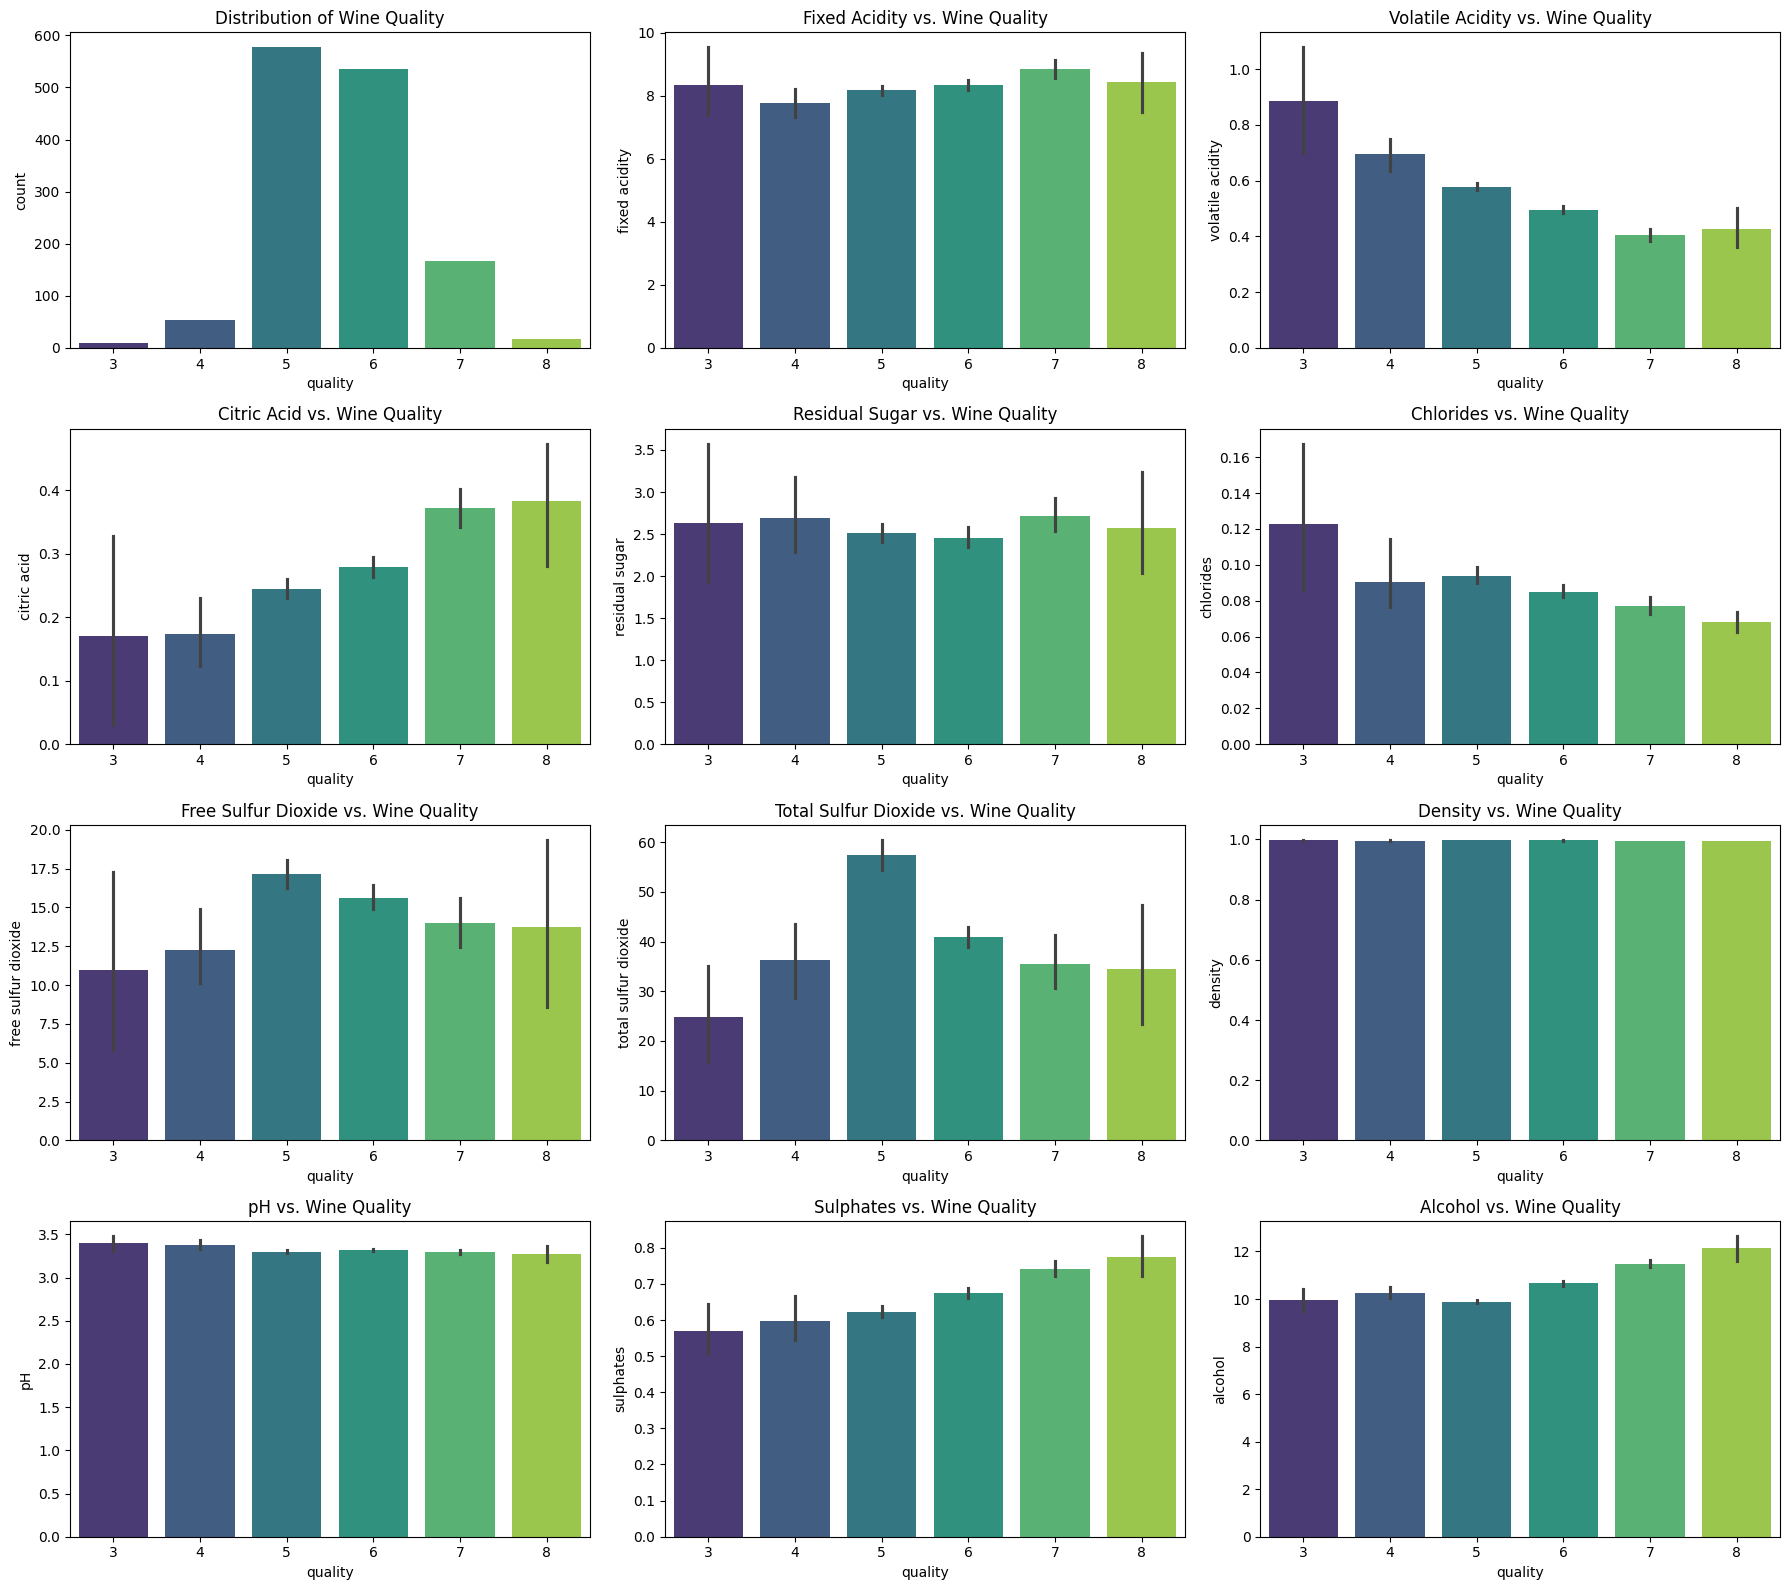

In [35]:
def data_visualization(dataset):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

    # First row
    sns.countplot(x= 'quality', data=dataset,  ax=axes[0, 0], palette='viridis')
    axes[0, 0].set_title('Distribution of Wine Quality')

    sns.barplot(x='quality', y='fixed acidity', data=dataset, ax=axes[0, 1], palette='viridis')
    axes[0, 1].set_title('Fixed Acidity vs. Wine Quality')

    sns.barplot(x='quality', y='volatile acidity', data=dataset, ax=axes[0, 2], palette='viridis')
    axes[0, 2].set_title('Volatile Acidity vs. Wine Quality')


    # Second row
    sns.barplot(x='quality', y='citric acid', data=dataset, ax=axes[1, 0], palette='viridis')
    axes[1, 0].set_title('Citric Acid vs. Wine Quality')

    sns.barplot(x='quality', y='residual sugar', data=dataset, ax=axes[1, 1], palette='viridis')
    axes[1, 1].set_title('Residual Sugar vs. Wine Quality')

    sns.barplot(x='quality', y='chlorides', data=dataset, ax=axes[1, 2], palette='viridis')
    axes[1, 2].set_title('Chlorides vs. Wine Quality')


    # Third row
    sns.barplot(x='quality', y='free sulfur dioxide', data=dataset, ax=axes[2, 0], palette='viridis')
    axes[2, 0].set_title('Free Sulfur Dioxide vs. Wine Quality')

    sns.barplot(x='quality', y='total sulfur dioxide', data=dataset, ax=axes[2, 1], palette='viridis')
    axes[2, 1].set_title('Total Sulfur Dioxide vs. Wine Quality')

    sns.barplot(x='quality', y='density', data=dataset, ax=axes[2, 2], palette='viridis')
    axes[2, 2].set_title('Density vs. Wine Quality')

    # Fourth row
    sns.barplot(x='quality', y='pH', data=dataset, ax=axes[3, 0], palette='viridis')
    axes[3, 0].set_title('pH vs. Wine Quality')

    sns.barplot(x='quality', y='sulphates', data=dataset, ax=axes[3, 1], palette='viridis')
    axes[3, 1].set_title('Sulphates vs. Wine Quality')

    sns.barplot(x='quality', y='alcohol', data=dataset, ax=axes[3, 2], palette='viridis')
    axes[3, 2].set_title('Alcohol vs. Wine Quality')

    plt.tight_layout()
    plt.show()

data_visualization(dataset = wine_dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

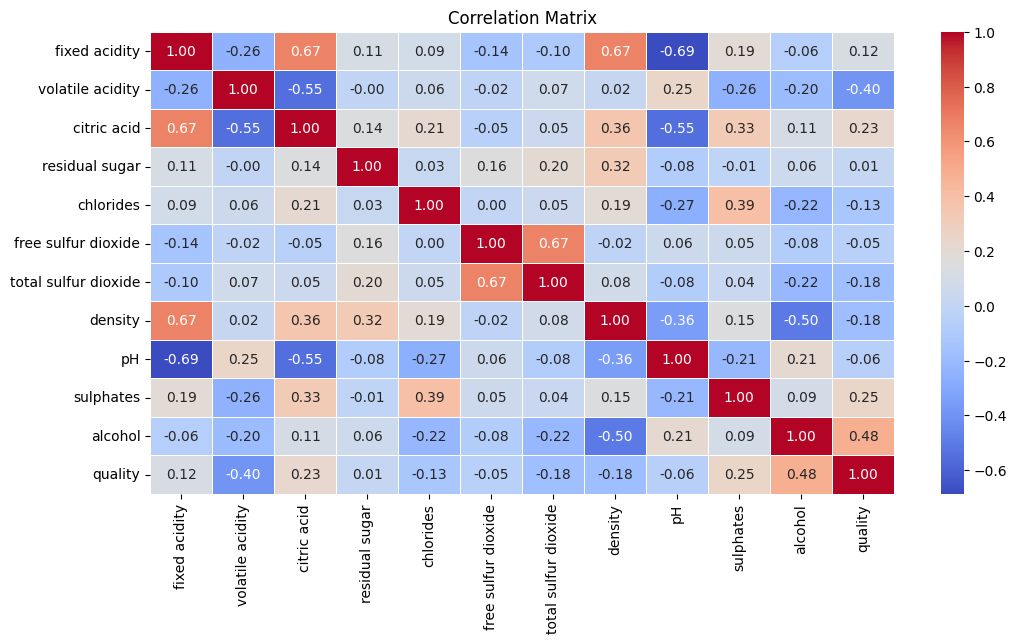

In [36]:
# Correlation heatmap
correlation_matrix = wine_dataset.corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show

**FEATURE ENGINEERING**

Since the values of the quality of wine are discrete, classification algorithms were used. So the quality of wine was divided into two classes.

* Good quality = quality >= 6
* Bad quality = quality < 6

We will binarize our wine quality using 0 and 1, where:

* 0 represents Bad wine quality
* 1 represents Good wine quality





In [37]:
input_features = list(wine_dataset.columns)[0:-1]
target_feature = 'quality'
input_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [38]:
# Encoding target column
wine_dataset[target_feature] = wine_dataset[target_feature].apply(lambda x: 'good' if x >= 6 else 'bad')
encoder = LabelEncoder()
wine_dataset[target_feature]= encoder.fit_transform(wine_dataset[target_feature])
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


In [39]:
# Scaling features
wine = wine_dataset.copy()
scaler = StandardScaler()
wine[input_features] = scaler.fit_transform(wine[input_features])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,1
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,0


**Splitting the dataset**

80% for train and 20% for test

In [40]:
input_df = wine[input_features]
target_series = wine[target_feature]
# input_df.head(5)
# target_series.head(5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(input_df, target_series, test_size= 0.2, random_state=42)
print('Train dataset size: ',X_train.shape)
print('Test dataset size: ',X_test.shape)
print('Train target dataset size: ',y_train.shape)
print('Test target dataset size: ',y_test.shape)

Train dataset size:  (1087, 11)
Test dataset size:  (272, 11)
Train target dataset size:  (1087,)
Test target dataset size:  (272,)


**MODEL TRAINING AND EVALUATION**

In [42]:
class TrainEvaluateModel:
  def __init__(self, model, train_data, test_data, train_target,
               test_target, model_name: str):
    self.model = model
    self.train_data = train_data
    self.test_data = test_data
    self.train_target = train_target
    self.test_target = test_target
    self.model_name = model_name

  def train(self):
    self.model.fit(self.train_data, self.train_target)

  def evaluate(self):
    train_pred = self.model.predict(self.train_data)
    test_pred = self.model.predict(self.test_data)

    train_accuracy = accuracy_score(self.train_target, train_pred)
    test_accuracy = accuracy_score(self.test_target, test_pred)

    prfs = precision_recall_fscore_support(self.test_target, test_pred)
    result = {
        'Train Accuracy': round(train_accuracy * 100, 2),
        'Test Accuracy / Accuracy': round(test_accuracy * 100, 2),
        'Precision': {
            'Bad quality': round(prfs[0][0] * 100, 2),
            'Good quality': round(prfs[0][1] * 100, 2)
            },
        'Recall': {
            'Bad quality': round(prfs[1][0] * 100, 2),
            'Good quality': round(prfs[1][1] * 100, 2)
            },
        'F1 Score': {
            'Bad quality': round(prfs[2][0] * 100, 2),
            'Good quality': round(prfs[2][1] * 100, 2)
            },
        'Support': {
            'Bad quality': round(prfs[3][0]),
            'Good quality': round(prfs[3][1])
            }
        }

    print(result)

  def visualize(self):
      y_pred = self.model.predict(self.test_data)
      cm = confusion_matrix(self.test_target, y_pred)

      plt.figure(figsize=(5, 3))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=['0', '1'],
                  yticklabels=['0', '1'])
      plt.title(f'Confusion Matrix - {self.model_name}')
      plt.xlabel('Predicted Label')
      plt.ylabel('True Label')
      plt.show()

{'Train Accuracy': 74.43, 'Test Accuracy / Accuracy': 76.47, 'Precision': {'Bad quality': 77.1, 'Good quality': 75.89}, 'Recall': {'Bad quality': 74.81, 'Good quality': 78.1}, 'F1 Score': {'Bad quality': 75.94, 'Good quality': 76.98}, 'Support': {'Bad quality': 135, 'Good quality': 137}}


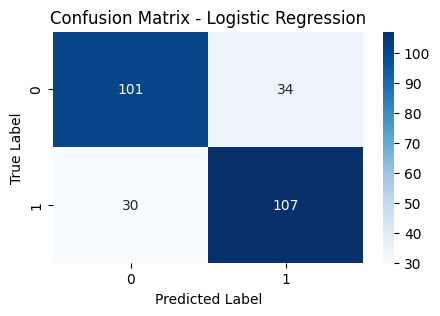

In [43]:
# Logistic Regression
lr = LogisticRegression(solver= 'liblinear')
lr_trainer = TrainEvaluateModel(lr, X_train, X_test, y_train, y_test, 'Logistic Regression')
lr_trainer.train()
lr_evaluation_result = lr_trainer.evaluate()
lr_evaluation_result
lr_trainer.visualize()

{'Train Accuracy': 100.0, 'Test Accuracy / Accuracy': 79.04, 'Precision': {'Bad quality': 80.47, 'Good quality': 77.78}, 'Recall': {'Bad quality': 76.3, 'Good quality': 81.75}, 'F1 Score': {'Bad quality': 78.33, 'Good quality': 79.72}, 'Support': {'Bad quality': 135, 'Good quality': 137}}


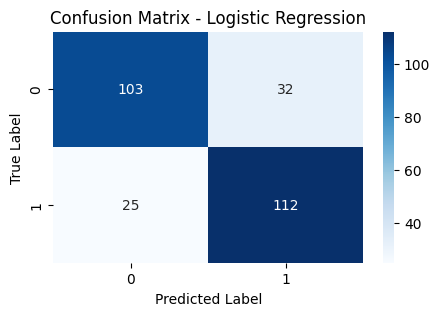

In [44]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 100,random_state=42)
rfc_trainer = TrainEvaluateModel(rfc, X_train, X_test, y_train, y_test, 'Logistic Regression')
rfc_trainer.train()
rfc_evaluation_result = rfc_trainer.evaluate()
rfc_evaluation_result
rfc_trainer.visualize()

{'Train Accuracy': 79.21, 'Test Accuracy / Accuracy': 77.57, 'Precision': {'Bad quality': 80.33, 'Good quality': 75.33}, 'Recall': {'Bad quality': 72.59, 'Good quality': 82.48}, 'F1 Score': {'Bad quality': 76.26, 'Good quality': 78.75}, 'Support': {'Bad quality': 135, 'Good quality': 137}}


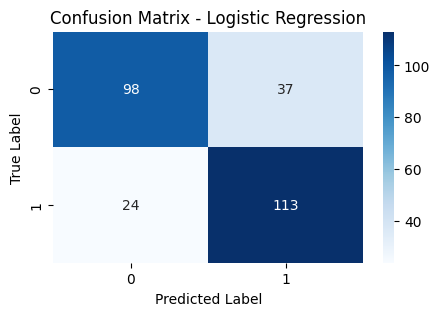

In [45]:
# Support Vector Classifier
svc = SVC(random_state=42)
svc_trainer = TrainEvaluateModel(svc, X_train, X_test, y_train,  y_test, 'Logistic Regression')
svc_trainer.train()
svc_evaluation_result = svc_trainer.evaluate()
svc_evaluation_result
svc_trainer.visualize()

{'Train Accuracy': 68.26, 'Test Accuracy / Accuracy': 69.12, 'Precision': {'Bad quality': 72.97, 'Good quality': 66.46}, 'Recall': {'Bad quality': 60.0, 'Good quality': 78.1}, 'F1 Score': {'Bad quality': 65.85, 'Good quality': 71.81}, 'Support': {'Bad quality': 135, 'Good quality': 137}}


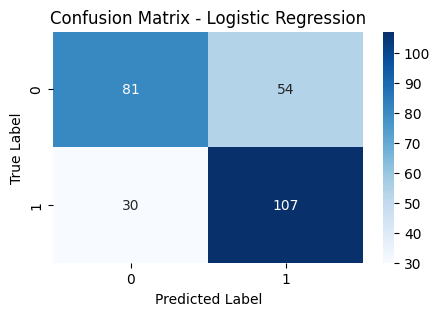

In [46]:
# Stochastic Gradient Descent
sgd = SGDClassifier(random_state = 42)
sgd_trainer = TrainEvaluateModel(sgd, X_train, X_test, y_train, y_test, 'Logistic Regression')
sgd_trainer.train()
sgd_evaluation_result = sgd_trainer.evaluate()
sgd_evaluation_result
sgd_trainer.visualize()

**Feature Selection**

Analysing the features involved to select which features greatly contribute the the quality of wine.

In [47]:
# Using Random Forests wights.
feature_importances = rfc.feature_importances_.tolist()
feature_importances

importance_df = pd.DataFrame({
    'features': input_features,
    'importances': feature_importances
})

importance_df = importance_df.sort_values(by='importances', ascending=False)
importance_df

,features,importances
10,alcohol,0.178099
9,sulphates,0.123199
1,volatile acidity,0.109052
6,total sulfur dioxide,0.104260
7,density,0.088532
4,chlorides,0.077204
8,pH,0.067991
0,fixed acidity,0.067062
2,citric acid,0.066051
5,free sulfur dioxide,0.060955


In [48]:
# Using Logistic Regression
feature_weights = lr.coef_[0].tolist()

weights_df = pd.DataFrame({
    'features': input_features,
    'weights': feature_weights
})

weights_df = weights_df.sort_values(by='weights', ascending=False)
weights_df


,features,weights
10,alcohol,0.993269
9,sulphates,0.388812
5,free sulfur dioxide,0.281578
7,density,0.116059
3,residual sugar,-0.010709
2,citric acid,-0.080043
0,fixed acidity,-0.086327
8,pH,-0.212359
4,chlorides,-0.219132
1,volatile acidity,-0.491051


**Wine Quality Predictor**

This program is able to predict the quality of wine based on the data you feed it. Make sure you enter the correct percentage of its constituents.

In [49]:
# def collect_wine_data():
#     print('Please enter the percentage of the following per your wine constituents in decimals')
#     wine_data = {
#         'fixed acidity': float(input('Fixed acidity: ')),
#         'volatile acidity': float(input('Volatile acidity: ')),
#         'citric acid': float(input('Citric acid: ')),
#         'residual sugar': float(input('Residual Sugar: ')),
#         'chlorides': float(input('Chlorides: ')),
#         'free sulfur dioxide': float(input('Free Sulphur dioxide: ')),
#         'total sulfur dioxide': float(input('Total Sulphur dioxide: ')),
#         'density': float(input('Density: ')),
#         'pH': float(input('pH: ')),
#         'sulphates': float(input('Sulphates: ')),
#         'alcohol': float(input('Alcohol: '))
#     }

#     return wine_data


In [50]:
wine_data = {
    'fixed acidity': 10.2,
    'volatile acidity': 1.28,
    'citric acid': 11.56,
    'residual sugar': 5.9,
    'chlorides': 0.875,
    'free sulfur dioxide': 124.0,
    'total sulfur dioxide': 30.0,
    'density': 1.,
    'pH': 4.16,
    'sulphates': 13.8,
    'alcohol': 5.8
  }

def predict_quality(input: dict, model):
  df = pd.DataFrame([input])
  col = list(df.columns)
  df[col] = scaler.transform(df[col])
  model.fit(X_test, y_test )
  prediction = model.predict(input_df)[0]
  probability = model.predict_proba(input_df)[0][list(model.classes_).index(prediction)]
  print(f"Prediction: {'Bad wine quality' if prediction == 0 else 'Good wine quality'}, Probability: {(probability *100 )}%")

predict_quality(wine_data, rfc)

# data= collect_wine_data()
# predict_quality(data, rfc)

Prediction: Bad wine quality, Probability: 74.0%
